In [23]:
import pandas as pd

rent_data = pd.read_csv("./Datasets/train.csv")
stock_data = pd.read_csv("./Datasets/auxiliary-data/sg-stock-prices.csv")


In [24]:
# Convert the date columns to datetime format
rent_data['rent_approval_date'] = pd.to_datetime(rent_data['rent_approval_date'])
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Extract year and month for both datasets
rent_data['year_month'] = rent_data['rent_approval_date'].dt.to_period('M')
stock_data['year_month'] = stock_data['date'].dt.to_period('M')

# Calculate the average monthly rent and stock closing prices
avg_monthly_rent = rent_data.groupby('year_month')['monthly_rent'].mean()
avg_monthly_stock_close = stock_data.groupby('year_month')['close'].mean()
avg_monthly_stock_open = stock_data.groupby('year_month')['open'].mean()

# avg_monthly_stock_price = (avg_monthly_stock_open + avg_monthly_stock_close) /2
# Merge the two datasets on year_month
merged_data = pd.merge(avg_monthly_rent, avg_monthly_stock_open, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(merged_data, avg_monthly_stock_close, left_index=True, right_index=True, how='inner')
merged_data

,monthly_rent,open,close
year_month,,,
2021-01,2152.142513,-13.125440,13.114216
2021-02,2146.756152,-14.599661,14.618197
2021-03,2167.458384,-14.161206,14.085527
2021-04,2182.674772,-14.967751,14.961380
2021-05,2216.537301,-14.713260,14.693714
2021-06,2223.939114,-15.310655,15.304651
2021-07,2252.984718,-15.080622,15.058458
2021-08,2249.901768,-16.107507,16.137989
2021-09,2233.926780,-16.268041,16.255017


(0.8533343087744114, 1.0663047277995433e-09)

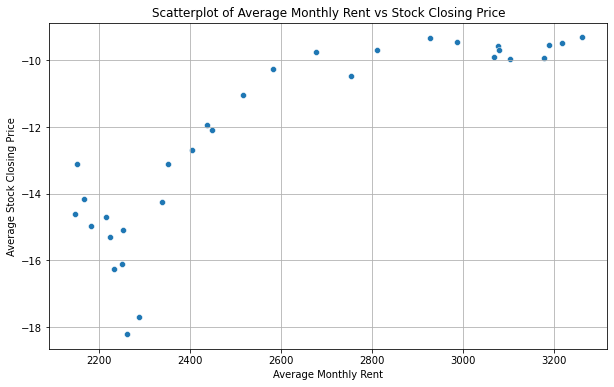

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='monthly_rent', y='open')
plt.title('Scatterplot of Average Monthly Rent vs Stock Closing Price')
plt.xlabel('Average Monthly Rent')
plt.ylabel('Average Stock Closing Price')
plt.grid(True)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_data['monthly_rent'], merged_data['open'])

correlation_coefficient, p_value

In [22]:
stock_path = './Datasets/test.csv'
stock_df = pd.read_csv(stock_path)

stock_df['rent_approval_date'] = pd.to_datetime(stock_df['rent_approval_date'])
stock_df['year_month'] = stock_df['rent_approval_date'].dt.to_period('M')
stock_df = stock_df.merge(merged_data, on='year_month', how='left')

stock_df['stock_price'] =  (stock_df['close'] + stock_df['open']) /2
# stock_df = stock_df.rename(columns={'close_y': 'close'})
# stock_df = stock_df.rename(columns={'close_y': 'close'})
stock_df = stock_df[['stock_price']]
stock_df.to_csv('./Datasets/stock_test.csv', index=False)